孟子曾在《孟子·离娄上》提出过一个关乎治国大略的民本思想，即“得民心者得天下”。对于企业而言，在关乎用户留存的问题上，亦秉持着这样的一个观点——“得留存者得天下”。由此，用户留存的重要性不可言喻。

用户留存，就是指用户在产品中停留下来。当产品无法留住用户时，产品就像是一个筛子，这也使得放进的砂砾越多流失的也就越多。对于客户流失率而言，每增加5%，利润就可能随之降低25%-85%。

随着市场饱和度的上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。因此，电信用户流失分析与预测至关重要。

 目录
1. 研究背景（Background ）
2. 提出问题（Business Understanding ）
3. 理解数据（Data Understanding）
 * 采集数据
 * 导入数据
 * 查看数据集信息
 * 数据集描述
4. 数据清洗（Data Preparation ）
 * 数据预处理
 * 特征工程（Feature Engineering）
5. 构建模型（Modeling） 
6. 模型评估（Evaluation） 
7. 方案实施 （Deployment）
 * 提交结果到Kaggle
 * 报告撰写

# 研究背景

对于用户留存而言，客户流失率每增加5%，利润就可能随之降低25%-85%。高昂的获客成本令电信运营商陷入获客难的窘境。随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。因此，电信用户流失分析与预测至关重要。

# 提出问题

1. 流失用户有哪些属性？
2. 尝试找到合适的模型预测流失用户。 
3. 针对性给出增加用户黏性、预防流失的建议。 
4. 计算LTV(生命周期价值) 

# 理解数据

## 采集数据

[项目来自Kaggle电信用户流失](https://www.kaggle.com/blastchar/telco-customer-churn)

## 导入数据

In [312]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入处理数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
#导入数据
dataset = pd.read_csv("/Users/apple/Desktop/kaggle数据集/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#这里要记住训练数据集有7043条数据，方便后面从中拆分出测试数据集用于提交Kaggle结果
print ('数据集:',dataset.shape)

数据集: (7043, 21)


## 查看数据集信息

In [314]:
#查看数据
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


用下图解释每一列的的具体含义。 
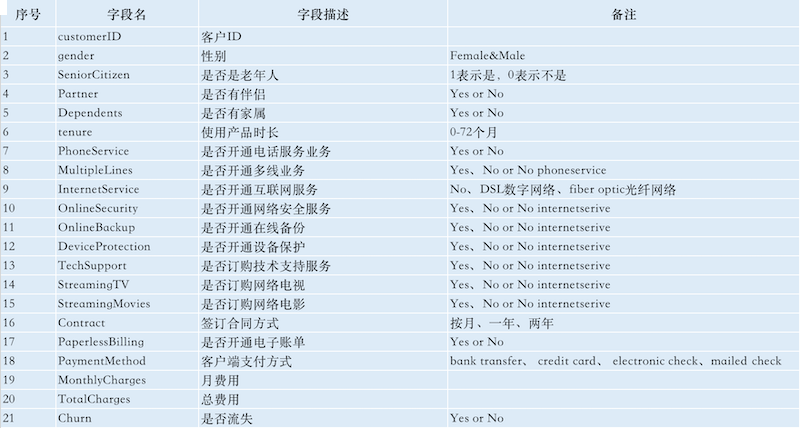

## 数据集描述

In [315]:
# 查看每一列的数据类型，和数据总数
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


根据上面打印的结果，我们发现数据总共有7043行，共有21个变量。每条记录包含了唯一客户的特征。
我们目标就是发现前20列特征和最后一列客户是否流失特征之间的关系。

# 数据清洗（Data Preparation ）

## 数据预处理

###  缺失值处理

In [316]:
#通过查看数据类型，发现'TotalCharges'总消费额的数据类型为字符串，应该转换为浮点型数据。
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')#,errors='coerce'
#dataset['MonthlyCharges']=pd.to_numeric(dataset['MonthlyCharges'],errors='coerce')
dataset.info()#'TotalCharges'列存在11个缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:title={'center':'留存用户的总付费直方图'}, xlabel='TotalCharges', ylabel='Density'>

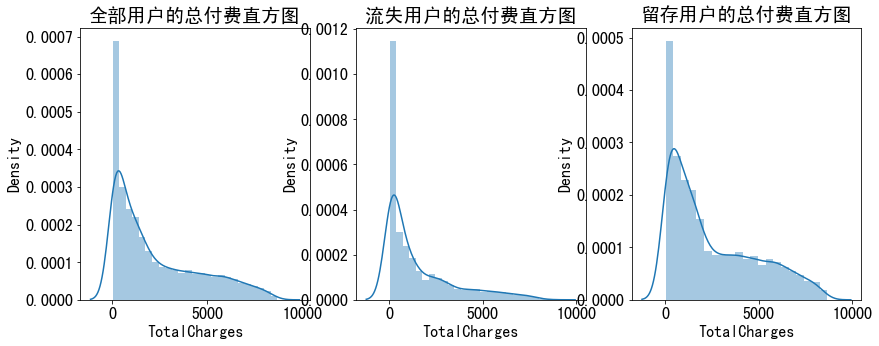

In [317]:
#TotalCharges列是数值型数据，先画直方图查看数据分布形态
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.title('全部用户的总付费直方图')
sns.distplot(dataset['TotalCharges'].dropna())

plt.subplot(1,3,2)
plt.title('流失用户的总付费直方图')
sns.distplot(dataset[dataset['Churn']=='Yes']['TotalCharges'].dropna())

plt.subplot(1,3,3)
plt.title('留存用户的总付费直方图')
sns.distplot(dataset[dataset['Churn']=='No']['TotalCharges'].dropna())

In [318]:
#依据上图可知，TotalCharges列呈偏态分布，故选择中位数填充。
dataset['TotalCharges'] = dataset['TotalCharges'].fillna( dataset['TotalCharges'].median())
dataset['TotalCharges'].isnull().sum()

0

# 可视化分析

根据一般经验，将用户特征划分为用户属性、服务属性、合同属性，并从这三个维度进行可视化分析。

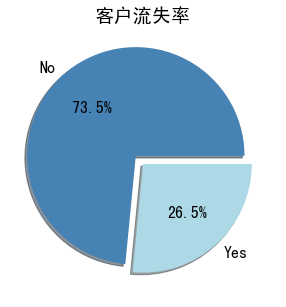

In [319]:
#查看流失用户数量和占比。
plt.figure(figsize=(5,5))
#plt.rcParams['font.sans-serif']=['SimHei'] #用黑体显示中文
# 数据
sizes=dataset['Churn'].value_counts()
labels=dataset['Churn'].value_counts().index
# 画图
plt.pie(sizes,explode=(0.1,0),labels=labels,colors=['#4682B4','#ADD8E6'],autopct='%1.1f%%',shadow=True)
plt.title('客户流失率')
# 展示
plt.show()

流失用户占比26.5%，留存用户占比73.5%，属于不平衡数据集。

## 用户属性分析

利用频数柱状图和频率叠堆图对用户属性进行可视化分析。

### 性别与年龄对流失的影响

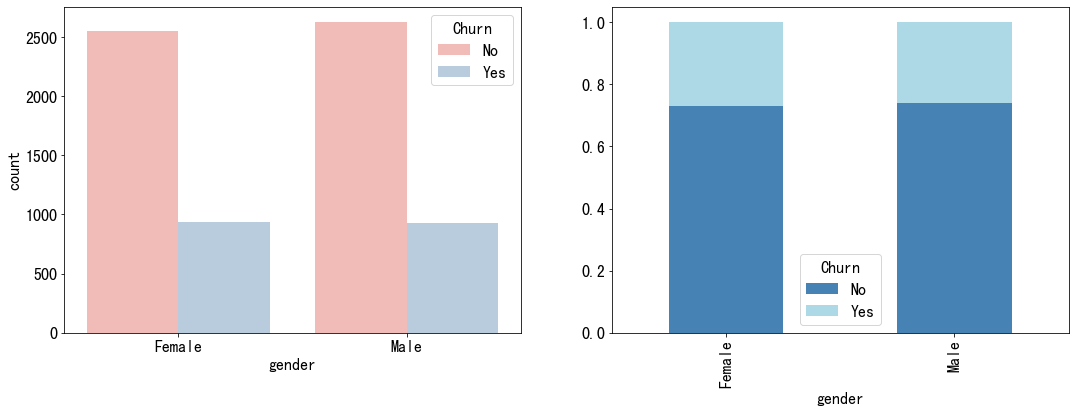

In [320]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='gender',hue='Churn',data=dataset,palette='Pastel1',ax=axes[0])
#sns.countplot(x='gender',data=dataset,hue='Churn',palette='Pastel1',ax=axes[1])
table=pd.crosstab(dataset['gender'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
###
#### 进行相除操作，得出比例
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[1])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='Churn'>

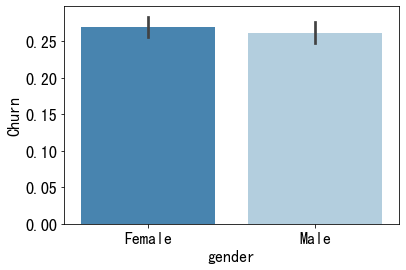

In [321]:
churn_dict={'Yes':1,'No':0}
dataset['Churn']=dataset['Churn'].map(churn_dict)
sns.barplot(data=dataset,x='gender',y='Churn',palette='Blues_r')

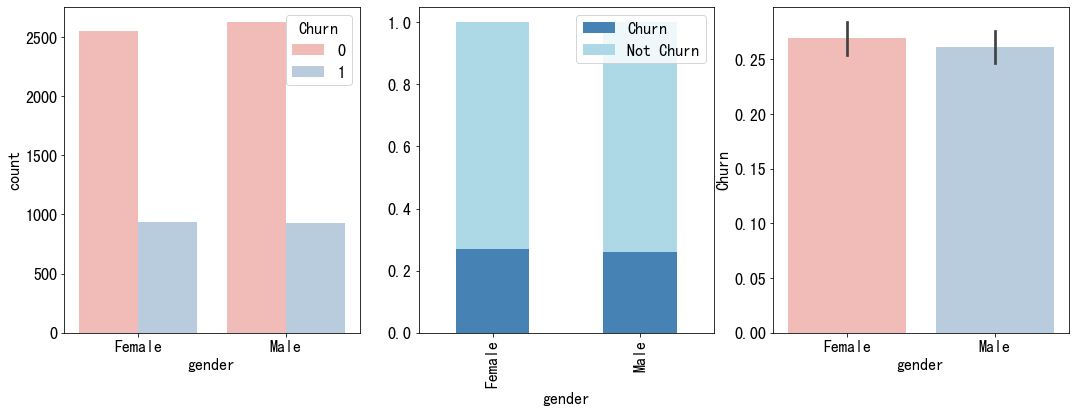

In [322]:
data=dataset.copy()
data['Not Churn']=1-data['Churn']
fig,axes = plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='gender',hue='Churn',data=data,palette='Pastel1',ax=axes[0])
#sns.barplot(data=data,x='Pclass',y='Survived',ax=axes[1],palette='Pastel1')
data.groupby('gender').agg('mean')[['Churn','Not Churn']].plot(kind='bar',stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[1])
#plt.title('性别与流失')
sns.barplot(x='gender',y='Churn',data=data,palette='Pastel1',ax=axes[2])
plt.show()

<AxesSubplot:xlabel='PaymentMethod'>

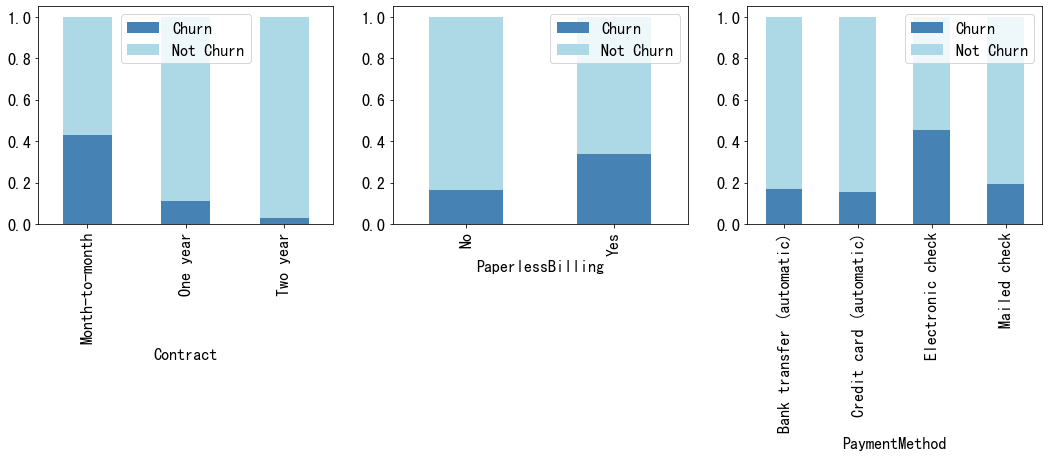

In [323]:
#data=dataset.copy()
#data['Not Churn']=1-data['Churn']
fig,axes = plt.subplots(1,3,figsize=(18,4))
#sns.countplot(x='PhoneService',hue='Churn',data=data,palette='Pastel1',ax=axes[0])
#sns.barplot(data=data,x='Pclass',y='Survived',ax=axes[1],palette='Pastel1')
data.groupby('Contract').agg('mean')[['Churn','Not Churn']].plot(kind='bar',stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[0])
data.groupby('PaperlessBilling').agg('mean')[['Churn','Not Churn']].plot(kind='bar',stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[1])
data.groupby('PaymentMethod').agg('mean')[['Churn','Not Churn']].plot(kind='bar',stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[2])
#data.groupby('TechSupport').agg('mean')[['Churn','Not Churn']].plot(kind='bar',stacked=True,color=['#4682B4','#ADD8E6'],ax=axes[3])
#plt.title('性别与流失')
#plt.show()

从上图中明显看出，性别与用户流失几乎没有差异。

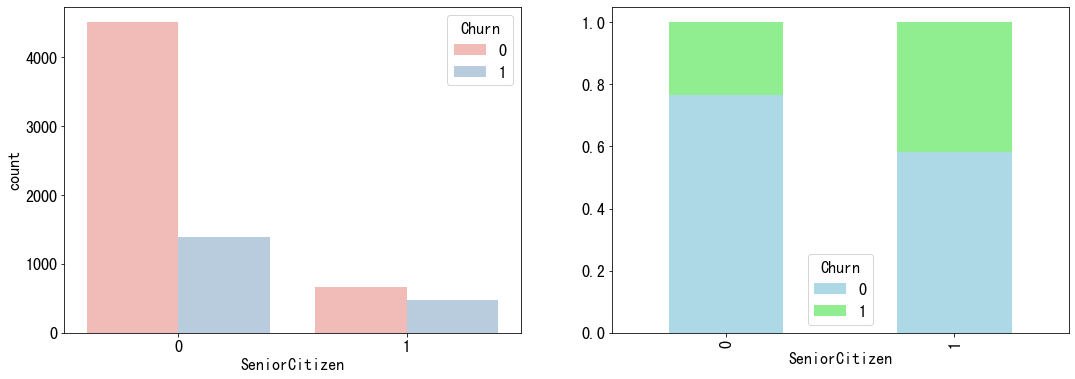

In [324]:
#下图中，0代表非老年人，1代表老年人。
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='SeniorCitizen',hue='Churn',data=dataset,palette='Pastel1',ax=axes[0])
#sns.countplot(x='gender',data=dataset,hue='Churn',palette='Pastel1',ax=axes[1])
table=pd.crosstab(dataset['SeniorCitizen'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
###
#### 进行相除操作，得出比例
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
plt.show()

从上图明显看出，相较于其他年龄段的用户而言，老年人用户数量较少，但老年用户的流失率要远远高于其他年龄用户。

### 有无伴侣对流失的影响

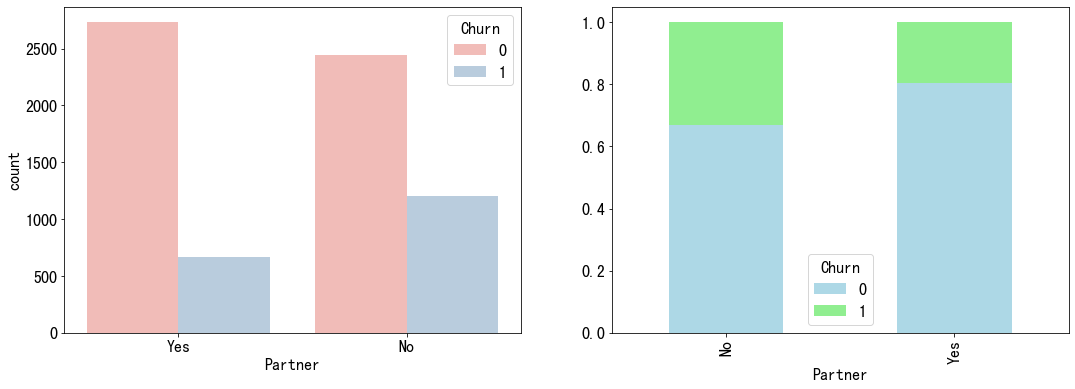

In [325]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='Partner',hue='Churn',data=dataset,palette='Pastel1',ax=axes[0])
table=pd.crosstab(dataset['Partner'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
plt.show()

上图中明显看出，没有伴侣的用户中流失人数比有伴侣的更多。与有伴侣的用户相比，没有伴侣的用户流失率更高。

### 有无家属对流失的影响

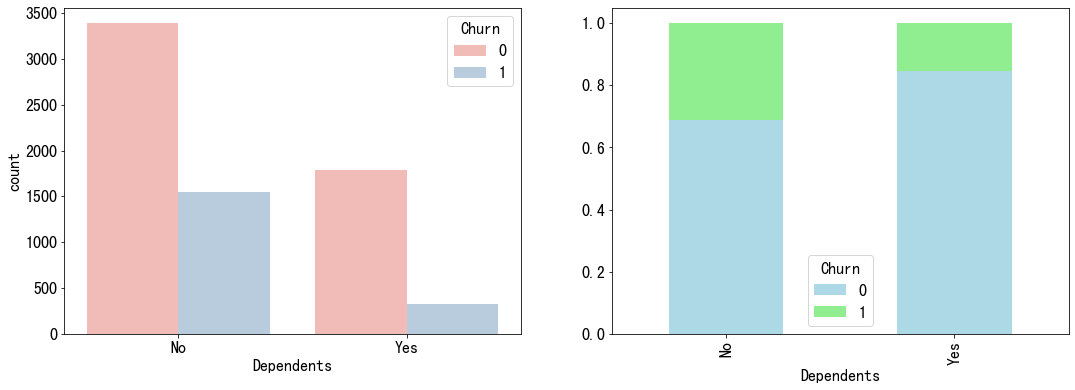

In [326]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='Dependents',hue='Churn',data=dataset,palette='Pastel1',ax=axes[0])
table=pd.crosstab(dataset['Dependents'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
plt.show()

从上图中明显看出，有家属的用户较少。与有家属的用户相比，没有家属的用户流失率更高。

### 使用时长对流失的影响

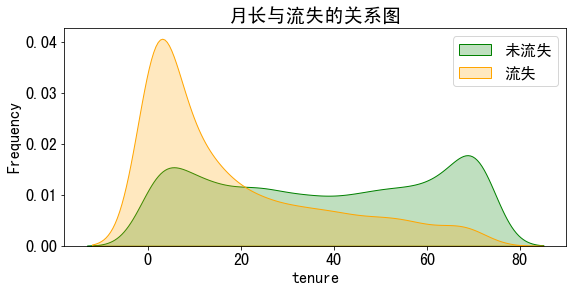

In [327]:
#tenture:用户使用时长,单位(月)
plt.figure(figsize=(9,4))
g=sns.kdeplot(dataset['tenure'][(dataset['Churn']==0)],color='green',shade=True)
g=sns.kdeplot(dataset['tenure'][(dataset['Churn']==1)],ax=g,color='orange',shade=True)
g.set_xlabel('tenure')
g.set_ylabel('Frequency')
plt.title('月长与流失的关系图')
g.legend(['未流失','流失'])

从上图中明显看出，使用时长越久流失率越低，符合一般经验；流失率在20月之前是最高的，看来20个月是个很关键的分水岭，要注重这段时间用户的维护，以降低流失率；之后流失率小于在用率，说明用户稳定期在20个月。

### 小结

通过对用户属性分析，得出如下：

* 用户流失与性别基本无关；
* 老年人用户数量较少，但老年用户的流失率要远远高于其他年龄用户。
* 有伴侣的用户流失占比低于无伴侣用户；
* 有家属的用户较少；
* 有家属的用户流失占比低于无家属用户；
* 使用年限越长，用户流失率越低；
* 使用时长达到20个月，流失率小于在网率，证明用户心理稳定期一般是20个月，如果要提升客户转化率不妨从这个时间点入手。

用户信息小结：
老年人、无伴侣、无家属、使用时长低于20个月的用户更容易流失；
在用时长达到20个月，流失率低于在用率，用户稳定期在20个月。

## 服务属性分析

可以直接从柱形图去判断对哪个维度对流失客户的影响大吗？

不能，因为“样本不均衡”（流失客户样本占比26.5%，留存客户样本占比73.5%），基数不一样，故不能直接通过“频数”的柱形图去分析。
解决办法：交叉分析，且作同行百分比（'Churn’作为“行”）

###  电话服务和多线业务对流失的影响

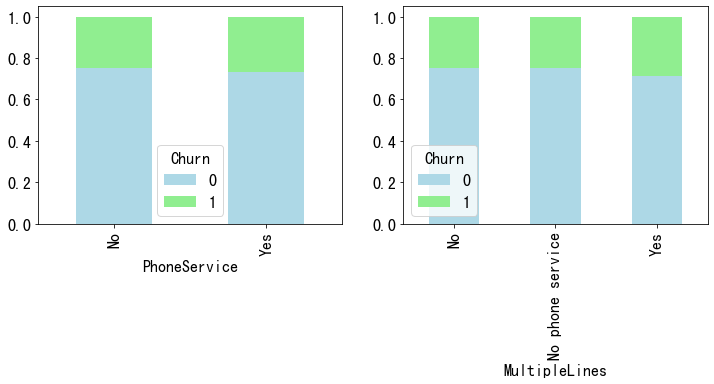

In [329]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,2,figsize=(12,4))
table=pd.crosstab(dataset['PhoneService'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[0])
table1=pd.crosstab(dataset['MultipleLines'],dataset['Churn'])
sum = table1.sum(axis=1)#.astype(float)
pro = table1.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
plt.show()

从上图中明显看出，电话服务对用户流失并无明显影响。是否开通多线业务对用户流失率差异不大。此外,MultipleLines取值为“No phone service” 和 “No”的两种情况基本一致，后续可以将“No internet service” 并到 “No”里面。

### 网络服务、网络安全、在线备份以及技术支持对流失的影响

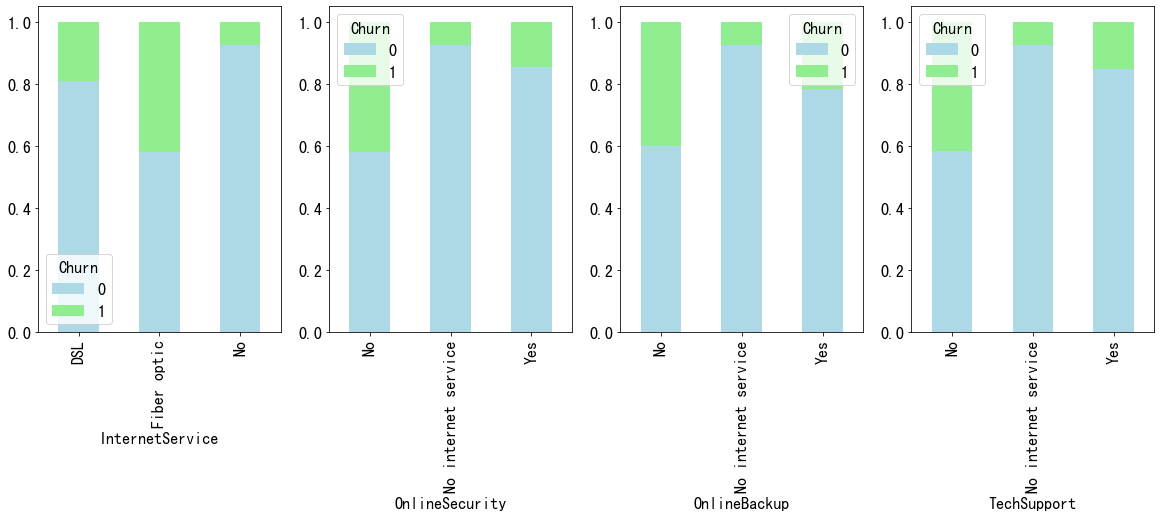

In [330]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,4,figsize=(20,6))
table=pd.crosstab(dataset['InternetService'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[0])
table1=pd.crosstab(dataset['OnlineSecurity'],dataset['Churn'])
sum = table1.sum(axis=1)#.astype(float)
pro = table1.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
table2=pd.crosstab(dataset['OnlineBackup'],dataset['Churn'])
sum = table2.sum(axis=1)#.astype(float)
pro = table2.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[2])
table3=pd.crosstab(dataset['TechSupport'],dataset['Churn'])
sum = table3.sum(axis=1)#.astype(float)
pro = table3.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[3])
plt.show()

从上图中明显看出，使用光纤网络的用户流失率高，无网络安全、无在线备份、无技术支持特征的用户流失率更高。

### 网络电视、网络电影和设备保护对用户流失的影响

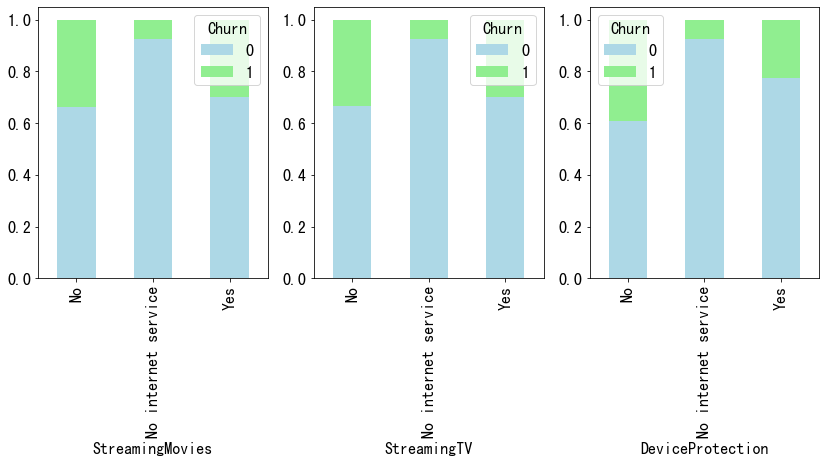

In [331]:
plt.rcParams['font.size']='16'
fig,axes = plt.subplots(1,3,figsize=(14,5))
table=pd.crosstab(dataset['StreamingMovies'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[0])
table1=pd.crosstab(dataset['StreamingTV'],dataset['Churn'])
sum = table1.sum(axis=1)#.astype(float)
pro = table1.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
table2=pd.crosstab(dataset['DeviceProtection'],dataset['Churn'])
sum = table2.sum(axis=1)#.astype(float)
pro = table2.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[2])
plt.show()

从上图可以明显看出，是否开通网络电视、网络电影对用户流失率差异不大。没有设备保护的用户流失率明显更高。

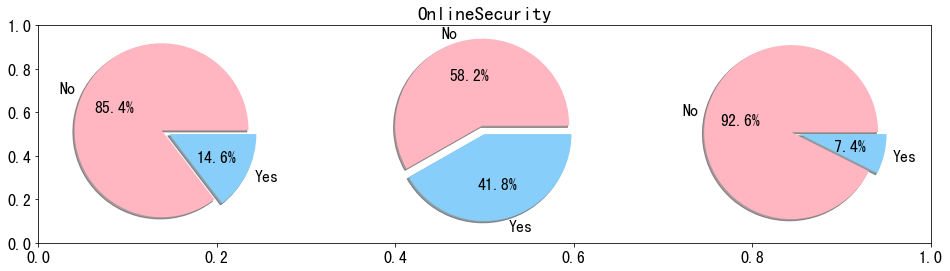

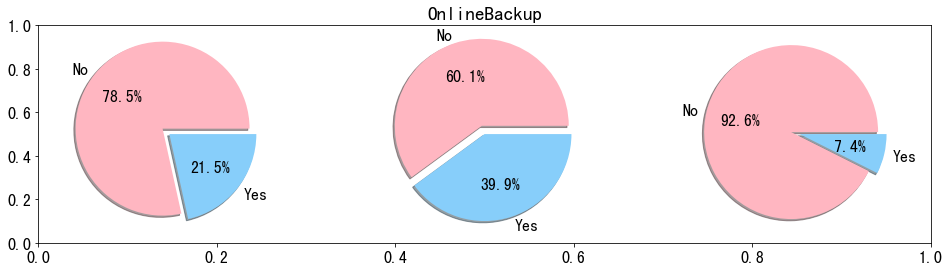

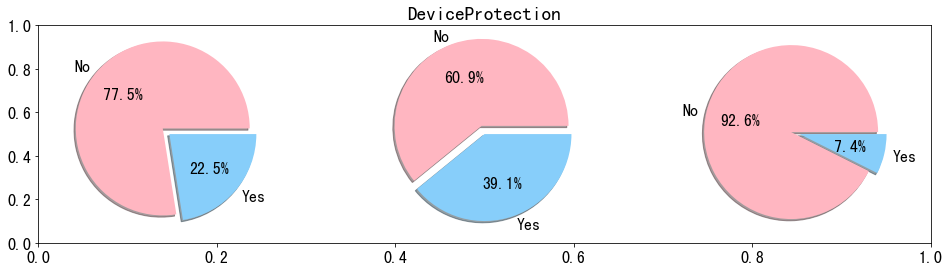

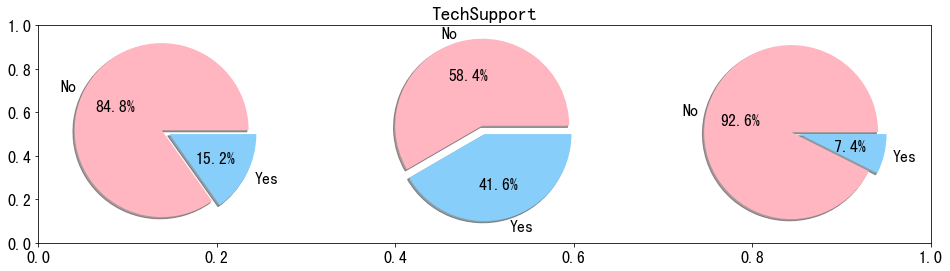

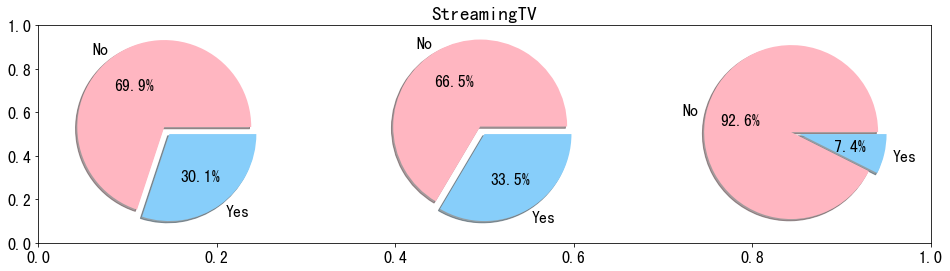

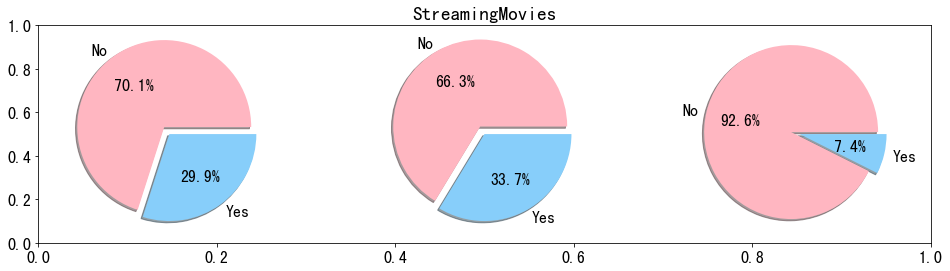

In [332]:
## 连续出图--画图
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    fig = plt.figure(figsize=(16,4)) # 建立图像
    #fig,axes = plt.subplots(1,3,figsize=(14,10))
    plt.title(i)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    ax1.pie(dataset[dataset[i] == 'Yes']['Churn'].value_counts(),explode=(0.1,0),labels=['No','Yes'],colors=['lightpink','lightskyblue'],autopct='%1.1f%%',shadow=True)
    ax2.pie(dataset[dataset[i] == 'No']['Churn'].value_counts(),explode=(0.1,0),labels=['No','Yes'],colors=['lightpink','lightskyblue'],autopct='%1.1f%%',shadow=True)
    ax3.pie(dataset[dataset[i] == 'No internet service']['Churn'].value_counts(),explode=(0.1,0),labels=['No','Yes'],colors=['lightpink','lightskyblue'],autopct='%1.1f%%',shadow=True)
# 展示
plt.show()

由图可知：
* 标签“No internet service”在上述六个特征中的客户流失率惊人的一致，均为7.40%。
* 可以判断原因是这六个特征均只在客户开通互联网业务之后才有实际意义，不开通“互联网服务”视为没开通这6项增值服务，故可以将 6个特征中的“No internet service” 并到 “No”里面。

### 小结

通过对服务属性分析，得出如下：

* 手机服务、是否使用多线路、网络电视、网络电影对用户流失率无明显影响。
* 使用光纤网络、无网络安全、无在线备份、无技术支持、无设备安全特征的用户流失率更高。

## 合同属性分析

### 签订合同方式对用户流失的影响

<Figure size 1080x576 with 0 Axes>

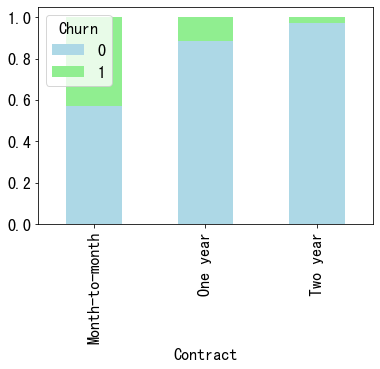

In [333]:
#plt.rcParams['font.size']='16'
#fig,axes = plt.subplots(figsize=(8,6))
fig = plt.figure(figsize=(15,8)) 
table=pd.crosstab(dataset['Contract'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'])
plt.show()

从上图明显看出，合同签订时间越短，用户流失率越高，其中月签约用户流失率超过40%。签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，证明长期合同最能保留客户。

In [334]:
pd.crosstab(dataset['Churn'],dataset['Contract'],normalize=1)

Contract,Month-to-month,One year,Two year
Churn,,,
0,0.572903,0.887305,0.971681
1,0.427097,0.112695,0.028319


### 纸质化账单与支付方式对用户流失的影响

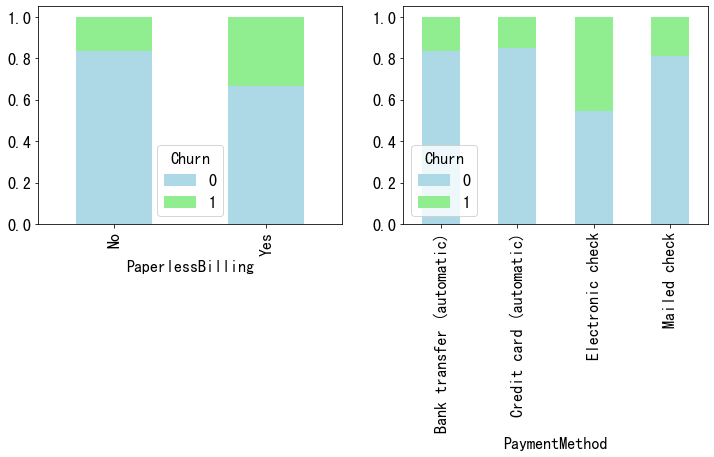

In [335]:
fig,axes = plt.subplots (1,2,figsize=(12,4)) 
table=pd.crosstab(dataset['PaperlessBilling'],dataset['Churn'])
sum = table.sum(axis=1)#.astype(float)
pro = table.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[0])
table1=pd.crosstab(dataset['PaymentMethod'],dataset['Churn'])
sum = table1.sum(axis=1)#.astype(float)
pro = table1.div(sum, axis=0)#div=division
pro.plot(kind='bar', stacked=True,color=['lightblue','lightgreen'],ax=axes[1])
plt.show()

从上图明显看出，使用纸质账单的用户流失率更高；采用电子支票支付的用户流失率最高，推测该方式的使用体验较为一般。

### 月费用与总费用对用户流失的影响

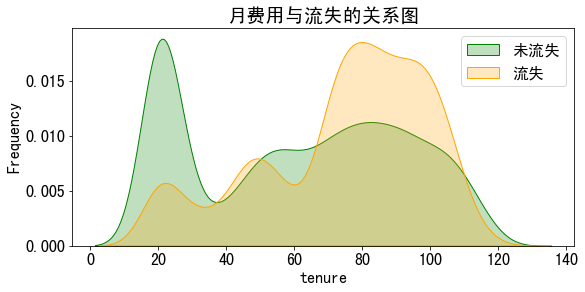

In [336]:
plt.figure(figsize=(9,4))
g=sns.kdeplot(dataset['MonthlyCharges'][(dataset['Churn']==0)],color='green',shade=True)
g=sns.kdeplot(dataset['MonthlyCharges'][(dataset['Churn']==1)],ax=g,color='orange',shade=True)
g.set_xlabel('tenure')
g.set_ylabel('Frequency')
plt.title('月费用与流失的关系图')
g.legend(['未流失','流失'])

从上图明显看出，月消费额大约在70-110之间用户流失率较高。

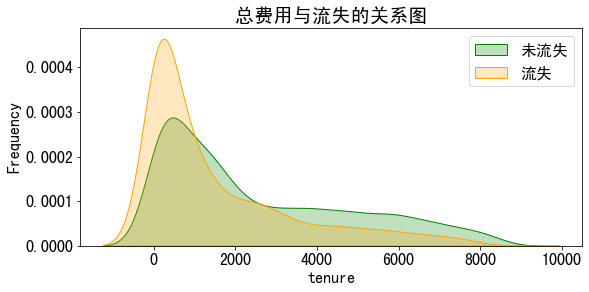

In [337]:
plt.figure(figsize=(9,4))
g=sns.kdeplot(dataset['TotalCharges'][(dataset['Churn']==0)],color='green',shade=True)
g=sns.kdeplot(dataset['TotalCharges'][(dataset['Churn']==1)],ax=g,color='orange',shade=True)
g.set_xlabel('tenure')
g.set_ylabel('Frequency')
plt.title('总费用与流失的关系图')
g.legend(['未流失','流失'])

从上图明显看出，总消费越高，用户流失率越低，符合一般经验。 

### 小结

如何改善？？
用户流失率、月均消费、总消费总体均随着使用时间增大而增长；
当用户使用时长超过70个月之后，用户价值得到极大的提升，说明长期来看，相比拉新、引导用户升级套餐，降低用户流失率能给公司带来更大的收益。

    采用电子支票支付的用户流失率最高，推测该方式的使用体验较为一般；
    签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，证明长期合同最能保留客户；
    月消费额大约在70-110之间用户流失率较高；
    长期来看，用户总消费越高，流失率越低，符合一般经验。


## 流失用户的基本特征

通过以上定类定量分析，我们可得到流失客户的基本用户特征：

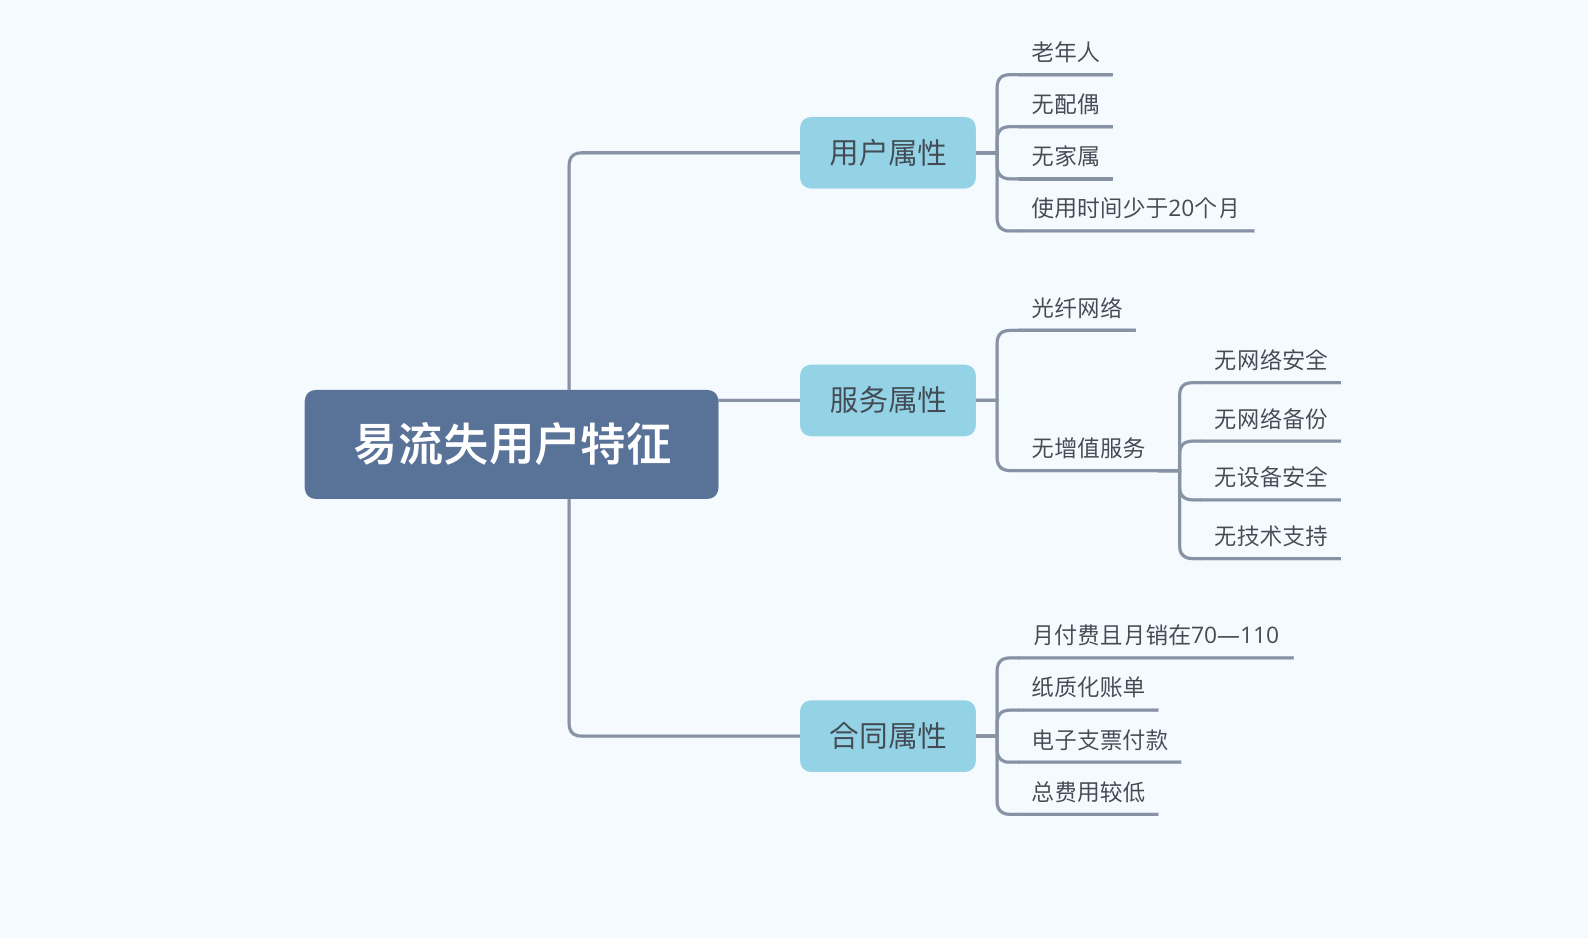

# 特征工程

## 特征提取

Text(0.5, 1.0, '用户流失与各个维度之间的关系')

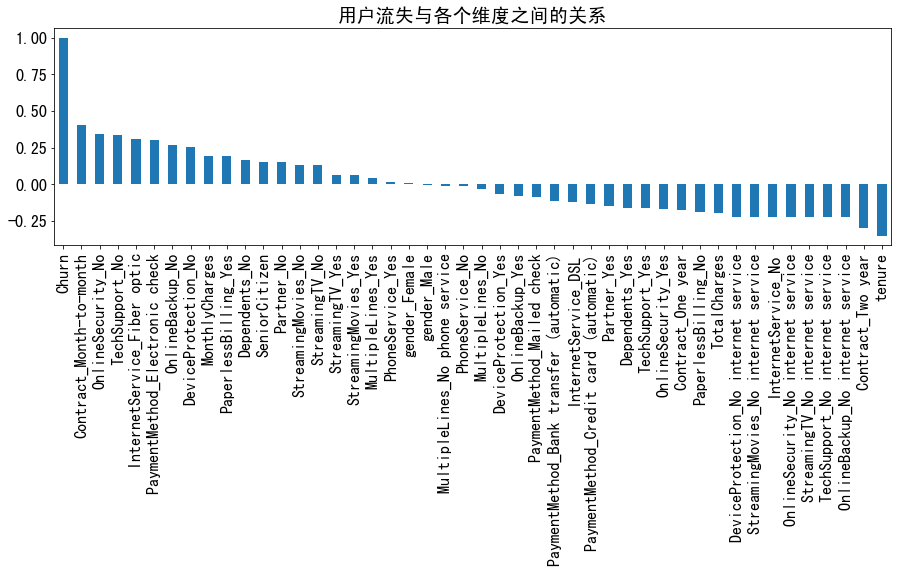

In [338]:
#根据下图可知，gender（性别）、PhoneService（电话服务）相关性几乎为0，故两个维度可以忽略。
df_onehot = pd.get_dummies(dataset.iloc[:,1:21])
df_onehot.head()
plt.figure(figsize=(15,4))
df_onehot.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('用户流失与各个维度之间的关系')

## 数据处理

### 特征离散化
“MonthlyCharges"、"TotalCharges"两个特征跟其他特征相比，量纲差异大。
处理量纲差异大，有两种方法：
* 标准化
* 离散化
* 以上两种方法，哪个能让模型精度提高，就选哪个。根据模型的最后得分，选择“离散化”来处理量纲差异大。

In [339]:
##查看"MonthlyCharges"列的4分位数
dataset['MonthlyCharges'].describe() 

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [340]:
#用四分位数对“MonthlyCharges”列进行离散 
def monthly_charges(s):
    if (s>=18.25)&(s<=35.5):
        return 1
    elif (s>35.5)&(s<=70.35):
        return 2
    elif (s>70.35)&(s<=89.85):
        return 3
    elif (s>89.85)&(s<=118.75):
        return 4
dataset['MonthlyCharges']=dataset['MonthlyCharges'].map(monthly_charges)
dataset['MonthlyCharges'].head()

0    1
1    2
2    2
3    2
4    3
Name: MonthlyCharges, dtype: int64

In [341]:
##查看"TotalCharges"列的4分位数
dataset['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [342]:
#用四分位数对“TotalCharges”列进行离散 
def total_charges(s):
    if (s>=18)&(s<=402):
        return 1
    elif (s>402)&(s<=1397):
        return 2
    elif (s>1397)&(s<=3786):
        return 3
    elif (s>3786)&(s<=8685):#8864
        return 4
dataset['TotalCharges']=dataset['TotalCharges'].map(total_charges)
dataset['TotalCharges'].head()

0    1
1    3
2    1
3    3
4    1
Name: TotalCharges, dtype: int64

In [343]:
dataset['TotalCharges'].isnull().sum()

0

### 特征标准化

In [344]:
#将“No internet service”并到“No”之中
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    dataset.loc[dataset[i] == 'No internet service',i] = 'No'
#将“No phone service”并到“No”之中
dataset.loc[dataset['MultipleLines'] == 'No phone service','MultipleLines'] = 'No'   
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,2,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,2,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),2,3,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,3,1,1


In [345]:
#将二分类变量转为数值型变量'PhoneService','Churn'
for i in ['Partner','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','StreamingTV','StreamingMovies']:
    dataset[i] = dataset[i].apply(lambda x :1 if x == 'Yes' else 0)
#gender_mapDict={'Female':1,'Male':0}
#dataset['gender']=dataset['gender'].map(gender_mapDict)
dataset.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,1,1,0
1,5575-GNVDE,Male,0,0,0,34,Yes,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,2,3,0
2,3668-QPYBK,Male,0,0,0,2,Yes,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,2,1,1
3,7795-CFOCW,Male,0,0,0,45,No,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),2,3,0
4,9237-HQITU,Female,0,0,0,2,Yes,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,3,1,1
5,9305-CDSKC,Female,0,0,0,8,Yes,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,4,2,1
6,1452-KIOVK,Male,0,0,1,22,Yes,1,Fiber optic,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),3,3,0
7,6713-OKOMC,Female,0,0,0,10,No,0,DSL,1,...,0,0,0,0,Month-to-month,0,Mailed check,1,1,0
8,7892-POOKP,Female,0,1,0,28,Yes,1,Fiber optic,0,...,1,1,1,1,Month-to-month,1,Electronic check,4,3,1
9,6388-TABGU,Male,0,0,1,62,Yes,0,DSL,1,...,0,0,0,0,One year,0,Bank transfer (automatic),2,3,0


In [346]:
#customerID是随机数，不影响建模，故可以筛选掉。
churn_var=dataset.iloc[:,2:20]
churn_var.drop("PhoneService",axis=1, inplace=True)
churn_var.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,1,1
1,0,0,0,34,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,2,3
2,0,0,0,2,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,2,1
3,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),2,3
4,0,0,0,2,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,3,1


In [347]:
churn_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SeniorCitizen     7043 non-null   int64 
 1   Partner           7043 non-null   int64 
 2   Dependents        7043 non-null   int64 
 3   tenure            7043 non-null   int64 
 4   MultipleLines     7043 non-null   int64 
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   int64 
 7   OnlineBackup      7043 non-null   int64 
 8   DeviceProtection  7043 non-null   int64 
 9   TechSupport       7043 non-null   int64 
 10  StreamingTV       7043 non-null   int64 
 11  StreamingMovies   7043 non-null   int64 
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   int64 
 14  PaymentMethod     7043 non-null   object
 15  MonthlyCharges    7043 non-null   int64 
 16  TotalCharges      7043 non-null   int64 
dtypes: int64(14), 

In [348]:
#['InternetService','Contract','PaymentMethod']
from sklearn.preprocessing import LabelEncoder
churn_var['InternetService'] = LabelEncoder().fit_transform(churn_var['InternetService'])
churn_var['Contract'] = LabelEncoder().fit_transform(churn_var['Contract'])
churn_var['PaymentMethod'] = LabelEncoder().fit_transform(churn_var['PaymentMethod'])

In [349]:
churn_var.head(50)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2,1,1
1,0,0,0,34,0,0,1,0,1,0,0,0,1,0,3,2,3
2,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,2,1
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,0,2,3
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,3,1
5,0,0,0,8,1,1,0,0,1,0,1,1,0,1,2,4,2
6,0,0,1,22,1,1,0,1,0,0,1,0,0,1,1,3,3
7,0,0,0,10,0,0,1,0,0,0,0,0,0,0,3,1,1
8,0,1,0,28,1,1,0,0,1,1,1,1,0,1,2,4,3
9,0,0,1,62,0,0,1,1,0,0,0,0,1,0,0,2,3


In [350]:
churn_var.isnull().any()

SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [351]:
churn_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   tenure            7043 non-null   int64
 4   MultipleLines     7043 non-null   int64
 5   InternetService   7043 non-null   int64
 6   OnlineSecurity    7043 non-null   int64
 7   OnlineBackup      7043 non-null   int64
 8   DeviceProtection  7043 non-null   int64
 9   TechSupport       7043 non-null   int64
 10  StreamingTV       7043 non-null   int64
 11  StreamingMovies   7043 non-null   int64
 12  Contract          7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  PaymentMethod     7043 non-null   int64
 15  MonthlyCharges    7043 non-null   int64
 16  TotalCharges      7043 non-null   int64
dtypes: int64(17)
memory usage: 935.5 

# 6.构建模型

## 切分特征和标签

In [352]:
X=churn_var
y=dataset['Churn']
print('抽样前的数据特征',X.shape)
print('抽样前的数据标签',y.shape)
##
y.value_counts()

抽样前的数据特征 (7043, 17)
抽样前的数据标签 (7043,)


0    5174
1    1869
Name: Churn, dtype: int64

## 样本不均衡问题

对于样本不均衡，一般常用的处理方式有如下三种：

* 分层抽样
* 过抽样
* 欠抽样

通过对比抽样方式，发现“过抽样”令模型精度更高。

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2,1,1
1,0,0,0,34,0,0,1,0,1,0,0,0,1,0,3,2,3
2,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,2,1
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,0,2,3
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,0,1,1,1,0,0,0,0,0,0,0,1,3,3,1
10344,1,0,0,15,1,1,0,0,0,0,0,0,0,1,1,3,2
10345,1,0,0,14,1,1,0,0,0,0,0,0,0,1,2,3,2
10346,0,0,0,15,1,1,0,0,0,0,0,0,0,1,1,3,2


## 建立训练数据集和测试数据集

In [355]:
X=pd.DataFrame(X,columns=churn_var.columns)
#分拆数据集：训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [356]:
print('过抽样数据特征：', X.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('过抽样后数据标签：', y.shape,
      '训练数据标签：',y_train.shape,
      '测试数据标签：',y_test.shape)


过抽样数据特征： (10348, 17) 训练数据特征： (7243, 17) 测试数据特征： (3105, 17)
过抽样后数据标签： (10348,) 训练数据标签： (7243,) 测试数据标签： (3105,)


## 选择机器学习算法

### 训练模型

In [357]:
#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier#随机森林
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.neighbors import KNeighborsClassifier#k近邻算法
from sklearn.tree import DecisionTreeClassifier#决策树
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB#朴素贝叶斯
from sklearn.metrics import confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [381]:
Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier(criterion = 'entropy', random_state = 0)],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier(eval_metric=['logloss','auc','error'])]]#增加eval_metric就没有warning提示了~~🆗
             #["CatBoost", CatBoostClassifier(logging_level='Silent')]  

In [ ]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier = classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10).mean()
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1score = f1_score(y_test, y_pred)
    class_eva=pd.DataFrame([accuracy_score,accuracies,recall,precision,f1score])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

In [154]:
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["accuracy_score","accuracies","recall","precision","f1score"]
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,GradientBoostingClassifier,XGB
accuracy_score,0.828663,0.764251,0.790660,0.796779,0.779388,0.791948,0.809662,0.832850
accuracies,0.823696,0.762532,0.784626,0.792077,0.771646,0.786560,0.801882,0.820934
recall,0.873556,0.829910,0.838254,0.910141,0.840822,0.829268,0.867779,0.891528
precision,0.802476,0.734659,0.766432,0.742797,0.749857,0.772727,0.778353,0.798735
f1score,0.836509,0.779385,0.800736,0.817998,0.792738,0.800000,0.820637,0.842584


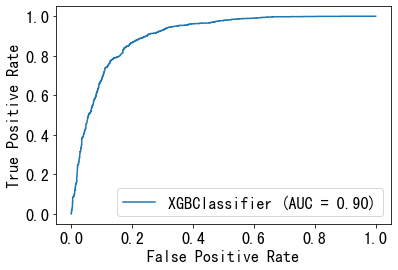

In [364]:
from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import plot_roc_curve
classifier_disp = plot_roc_curve(classifier, X_test, y_test)
plt.show()

## 模型调参

In [372]:
from sklearn.model_selection import GridSearchCV
params={"learning_rate":[0.01,0.05,0.1,0.2],"n_estimators":[50,100,150],"max_depth":[1,3,5]}
gridxgbc = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=100,gamma=0, subsample=0.8,  colsample_bytree=0.8, nthread=1, scale_pos_weight=1,eval_metric ='logloss', seed=27),param_grid=params,cv=5)
gridxgbc.fit(X_train,y_train)
print(gridxgbc.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


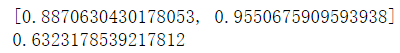

In [375]:
classifier = XGBClassifier(learning_rate=0.1,min_child_weight=1,
max_depth=9,n_estimators=250,gamma=0.4, subsample=0.9, colsample_bytree=0.6, nthread=1, scale_pos_weight=1,eval_metric ='logloss', seed=27)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [380]:
recall,precision

(0.8838254172015404, 0.8052631578947368)

调参后XGBoost模型的精确率为80.5%、召回率为88.30%。

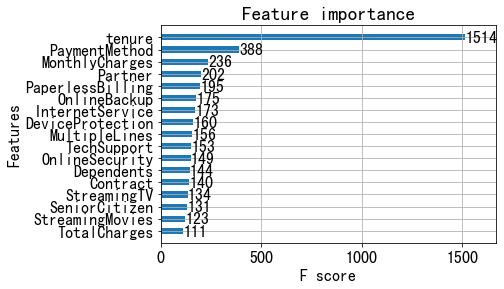

In [379]:
from xgboost import plot_importance
plot_importance(xgbc,height=0.5)
plt.show()

从上图可以清楚的看到，前三项占权重最高的分别是：使用时长，付费方式和月费用。

In [217]:
classifier = XGBClassifier(learning_rate=0.1,min_child_weight=1,
max_depth=9,n_estimators=250,gamma=0.4, subsample=0.9,  colsample_bytree=0.6, nthread=1, scale_pos_weight=1,eval_metric ='logloss', seed=27)
# 'colsample_bytree': 0.6, 'subsample': 0.9} 
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score=metrics.accuracy_score(y_test, y_pred)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10).mean()
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [218]:
recall,precision #0.1,200

(0.8902439024390244, 0.8049912942542078)

## 评估模型

评估模型使用的是测试数据。因为我们这里使用的是分类机器学习算法，所以模型的score方法计算出的就是模型的准确率。

score方法输入的第1个参数test_X是测试数据的特征，test_y是测试数据的标签。这个计算正确率的过程我在下面图中也用图形表示出来了。

首先输入模型的是测试数据的特征和标签，模型输出预测结果。在这个案例里，因为输入的特征比较多，我们用x来表示好了。

## 运营建议

1. 用户方面：
   * 针对老年用户、无亲属、无伴侣用户的特征推出定制服务如老年朋友套餐、温暖套餐等。鼓励用户加强关联，推出各种亲子套餐、情侣套餐等，满足客户的多样化需求。针对新注册用户，推送半年优惠如赠送消费券，以度过用户流失高峰期(用户流失的高峰期在前半年)。
2. 服务方面：
   * 针对光纤用户可以推出光纤和通讯组合套餐，对于连续开通半年以上的用户给予优惠减免。由于使用光缆的用户有很高的流失率，需要研究其流失原因，通过检查该产品的质量问题和对客户关于产品的满意度等方面进行检查。针对在线安全、在线备份、设备保护、技术支持等增值服务，应重点对用户进行推广介绍，后续可以尝试限时优惠或者限时赠送的活动，如首月/半年免费体验，使客户习惯并受益于这些服务
3. 交易倾向方面：
   * 针对单月合同用户，建议推出年合同付费折扣活动，将月合同用户转化为年合同用户，提高用户存留时长，以减少用户流失。 针对采用电子支票支付用户，建议定向推送其它支付方式的优惠券，引导用户改变支付方式。对于开通电子账单的客户，可以在电子账单上增加等级积分等显示，等级升高可以免费享受增值服务，积分可以兑换某些日用商品。